Logistic regression with 95.8% accuracy. This uses n-gram as feature to identify the relationship of words. Drops the empty rows.

_LABELS
- 0 - real
- 1 - fake


In [36]:
# read dataset
import pandas as pd
data = pd.read_csv('/Users/ellen/OneDrive/Documents/Python/archive/WELFake_Dataset.csv')
data.head() #show columns

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [37]:
data.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [38]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [39]:
data = data.dropna()
print("Original DataFrame shape:", data.shape)
print("New DataFrame shape:", data.shape)
data.isnull().sum()

Original DataFrame shape: (71537, 4)
New DataFrame shape: (71537, 4)


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [40]:
data.label.value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [42]:
# Combining title and text
data['content'] = data['title'] + ' ' + data['text']

# Drop rows with missing values
data.dropna(inplace=True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['label'], test_size=0.20, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train['content'])
count_test = count_vectorizer.transform(X_test['content'])

In [46]:
# Train logistic regression model with a specific solver
logistic_regression_model = LogisticRegression(solver='liblinear', max_iter=1000)  # Adjust solver and max_iter as needed
logistic_regression_model.fit(count_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [47]:
# Make predictions on the test set
predicted = logistic_regression_model.predict(count_test)

# Evaluate the model
print(classification_report(y_test, predicted))
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", round(accuracy * 100), '%')
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7081
           1       0.95      0.97      0.96      7227

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308

Accuracy: 96 %
Accuracy: 0.9585546547386078


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [49]:
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[6714  367]
 [ 226 7001]]


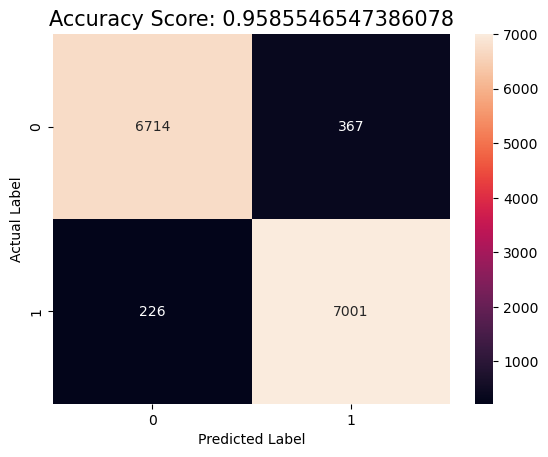

In [50]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot = True, fmt = '')
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
# plt.title('Confusion Matrix')
all_sample_title  = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
plt.show()

In [52]:
def predict_fake_news(news):
    # Transform new data using the same fitted CountVectorizer
    news_transformed = count_vectorizer.transform([news])
    
    # Make predictions
    prediction = logistic_regression_model.predict(news_transformed)

    return 'Real' if prediction[0] == 0 else 'Fake'

example_news = "SATAN 2: Russia unveils an image of its terrifying new nuclear missile"
predicted_label = predict_fake_news(example_news)
print(predicted_label)

Fake


In [53]:
print(predict_fake_news("A solar flare could leave the world without internet in 2024"))

Fake


In [54]:
print(predict_fake_news("Trump tussle gives unpopular Mexican leader much-needed shot in arm"))

Fake


In [55]:
print(predict_fake_news("Satellite imagery shows more than 500 bomb craters in Gaza"))

Fake


In [56]:
print(predict_fake_news("Trump urged Michigan officials not to certify 2020 vote"))

Fake


In [57]:
print(predict_fake_news("India won the fifa worldcup."))

Fake


In [58]:
print(predict_fake_news("Trump to nominate former NASA chief Griffin for defense undersecretary"))

Fake


In [65]:
print(predict_fake_news("U.S. President Donald Trump intends to nominate Michael Griffin, a former administrator of the National Aeronautics and Space Administration (NASA), as undersecretary of defense for research and engineering,"))

Real


In [66]:
print(predict_fake_news("Trump to run for 2024 elections"));

Fake


In [59]:
print(predict_fake_news("WASHINGTON (Reuters) - U.S. President Donald Trump intends to nominate Michael Griffin, a former administrator of the National Aeronautics and Space Administration (NASA), as undersecretary of defense for research and engineering, the White House said on Monday. The White House had said in October that Trump intended to tap Griffin for principal deputy undersecretary of defense for acquisition, technology, and logistics. Mondayâ€™s announcement did not give a reason for the change. Griffin most recently served as chairman and chief executive officer of the Schafer Corporation, a provider of scientific, engineering, and technical services and products in the national security sector, the White House said. He held the top NASA job from 2005 to 2009. "))

Real


In [63]:
print(predict_fake_news("At U.S.-China summit, Trump presses Xi on trade, North Korea; progress cited PALM BEACH, Fla. (Reuters) - President Donald Trump pressed Chinese President Xi Jinping to do more to curb North Koreaâ€™s nuclear program and help reduce the gaping U.S. trade deficit with Beijing in talks on Friday, even as he toned down the strident anti-China rhetoric of his election campaign. Trump spoke publicly of progress on a range of issues in his first U.S.-China summit â€“ as did several of his top aides â€“ but they provided few concrete specifics other than Chinaâ€™s agreement to work together to narrow disagreements and find common ground for cooperation. As the two leaders wrapped up a Florida summit overshadowed by U.S. missile strikes in Syria overnight, Xi joined Trump in stressing the positive mood of the meetings while papering over deep differences that have caused friction between the worldâ€™s two biggest economies. Trumpâ€™s aides insisted he had made good on his pledge to raise concerns about Chinaâ€™s trade practices and said there was some headway, with Xi agreeing to a 100-day plan for trade talks aimed at boosting U.S. exports and reducing Chinaâ€™s trade surplus with the United States. Speaking after the two-day summit at Trumpâ€™s Mar-a-Lago resort in Florida, U.S. Secretary of State Rex Tillerson also said that Xi had agreed to increased cooperation in reining in North Koreaâ€™s missile and nuclear programs â€“ though he did not offer any new formula for cracking Pyongyangâ€™s defiant attitude.  Trump had promised during the campaign to stop what he called the theft of American jobs by China. Many blue-collar workers helped propel him to his unexpected election victory on Nov. 8 and Trump is under pressure to deliver for them. The Republican president tweeted last week that the United States could no longer tolerate massive trade deficits and job losses and that his meeting with Xi â€œwill be a very difficult one.â€  On Friday, the unpredictable Trump not only set a different tone but also avoided any public lapses in protocol that Chinese officials had feared could embarrass their leader. â€œWe have made tremendous progress in our relationship with China,â€ Trump told reporters as the two delegations met around tables flanked by large U.S. and Chinese flags. â€œWe will be making additional progress. The relationship developed by President Xi and myself I think is outstanding. â€œAnd I believe lots of very potentially bad problems will be going away,â€ he added, without providing details. Xi also spoke in mostly positive terms. â€œWe have engaged in deeper understanding, and have built a trust,â€ he said. â€œI believe we will keep developing in a stable way to form friendly relations ... For the peace and stability of the world, we will also fulfill our historical responsibility.â€ â€œWell, I agree with you 100 percent,â€ Trump replied. Chinaâ€™s official Xinhua news agency said Xi had encouraged the United States to take part in the â€œOne Belt, One Roadâ€ plan, Xiâ€™s signature foreign policy imitative aimed at infrastructure development across Asia, Africa and Europe, seen in some policy circles as a partial answer to the pivot to Asia strategy of Trumpâ€™s predecessor Barack Obama. Xi also hailed military to military exchanges and said China and the United States should â€œmake good use of the dialogue mechanism to be established between the two countriesâ€™ joint staffs of the armed forcesâ€, although Xinhua did not give further details. Chinese state media on Saturday cheered the meeting as one that showed the world that confrontation between the two powers was not inevitable and established the tone for the development of U.S.-China relations. But in a sign that rough spots remained, Tillerson afterwards described the discussions as â€œvery frank and candid.â€ â€œPresident Trump and President Xi agreed to work in concert to expand areas of cooperation while managing differences based on mutual respect,â€ he said. After the meeting, Trump took Xi on a walk around the manicured grounds of his lavish Spanish-style complex. Trump could be seen chatting and gesturing to Xi, who did the same. Tillerson said Trump had accepted Xiâ€™s invitation to visit China and that they also agreed to upgrade a U.S.-China dialogue by putting the two presidents at the head of the forum. U.S. Commerce Secretary Wilbur Ross said the Chinese had expressed an interest in reducing Chinaâ€™s trade surplus as a way of controlling their own inflation. â€œThatâ€™s the first time Iâ€™ve heard them say that in a bilateral context,â€ he said. Ross declined to say whether the United States was ready to designate China a currency manipulator, however, referring to an upcoming report in which that issue would be addressed. Although Trump during the presidential election campaign had pledged to label China a currency manipulator on the first day of his administration, he has refrained from doing so.  The highly anticipated U.S.-China summit was upstaged by U.S. missile strikes overnight against a Syrian air base from which Trump said a deadly chemical weapon attack had been launched earlier in the week. It was the first direct U.S. assault on the Russian-backed government of Syrian President Bashar al-Assad in six years of civil war.  The swift action in Syria could be interpreted as a signal especially to defiant nuclear-armed North Korea â€“ and by extension, its ally China â€“ as well as other countries like Iran and Russia of Trumpâ€™s willingness to use military force. North Korea is developing missiles capable of hitting the United States. Tillerson said Xi agreed with Trump that North Koreaâ€™s nuclear advances had reached a â€œvery serious stage.â€ He said Trump also raised U.S.concerns about Chinaâ€™s activities in the South China Sea. Beijing is building and fortifying islands in pursuit of expansive territorial claims in the strategic waterway."))

Real


In [64]:
print(predict_fake_news("Trump legal clashes reach US Supreme Court as 2024 election nears WASHINGTON, Dec 21 (Reuters) - Donald Trump transformed the U.S. Supreme Court during his four years as president. Now the 6-3 conservative majority he cemented will confront a handful of cases that may determine whether the Republican can reclaim the White House.\
The court is poised to play an outsized role in the 2024 presidential election by hearing disputes over Trump's role in the run-up to a Jan. 6, 2021, attack on the U.S. Capitol in which his supporters tried to stop Congress from certifying Joe Biden's election victory. The politically explosive cases have the potential to once again thrust the country's highest court into the election limelight almost a quarter-century after its fateful 2000 ruling effectively handed the White House to Republican George W. Bush.\
What is extraordinary this year is that the court might have a huge effect before the election, especially in determining whether Donald Trump can be on the ballot and whether the federal criminal prosecution of him can go forward,” said Erwin Chemerinsky, dean of the University of California Berkeley Law School."))

Real


In [73]:
print(predict_fake_news("Reuters: Voters aiming to ban Trump from Colorado ballot urge US Supreme Court ruling"))

Real


In [74]:
print(predict_fake_news("Voters aiming to ban Trump from Colorado ballot urge US Supreme Court ruling"))

Fake


Conclusion: The model, when tried, it performed well when there is enough context. A title of the article would not do.